### Week 2 Homework
ATTENTION: At the end of the submission form, you will be required to include a link to your GitHub repository or other public code-hosting site. This repository should contain your code for solving the homework. If your solution includes code that is not in file format, please include these directly in the README file of your repository.

In case you don't get one option exactly, select the closest one

For the homework, we'll be working with the green taxi dataset located here:

https://github.com/DataTalksClub/nyc-tlc-data/releases/tag/green/download

You may need to reference the link below to download via Python in Mage:

https://github.com/DataTalksClub/nyc-tlc-data/releases/download/green/

Assignment
The goal will be to construct an ETL pipeline that loads the data, performs some transformations, and writes the data to a database (and Google Cloud!).

- Create a new pipeline, call it green_taxi_etl
- Add a data loader block and use Pandas to read data for the final quarter of 2020 (months 10, 11, 12).
- You can use the same datatypes and date parsing methods shown in the course.
BONUS: load the final three months using a for loop and pd.concat
- Add a transformer block and perform the following:
- Remove rows where the passenger count is equal to 0 and the trip distance is equal to zero.
- Create a new column lpep_pickup_date by converting lpep_pickup_datetime to a date.
- Rename columns in Camel Case to Snake Case, e.g. VendorID to vendor_id.
- Add three assertions:
-- vendor_id is one of the existing values in the column (currently)
-- passenger_count is greater than 0
-- trip_distance is greater than 0
- Using a Postgres data exporter (SQL or Python), write the dataset to a table called green_taxi in a schema mage. Replace the table if it already exists.
- Write your data as Parquet files to a bucket in GCP, partioned by lpep_pickup_date. Use the pyarrow library!
- Schedule your pipeline to run daily at 5AM UTC.

### Question 1. Data Loading
### Once the dataset is loaded, what's the shape of the data?


In [ ]:
# Data loader
import io
import pandas as pd
import requests
if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@data_loader
def load_data_from_api(*args, **kwargs):
    """
    Template for loading data from API
    """

    taxi_dtypes = {
        'VendorID': 'Int64',
        'store_and_fwd_flag': 'str',
        'RatecodeID': 'Int64',
        'PULocationID': 'Int64',
        'DOLocationID': 'Int64',
        'passenger_count': 'Int64',
        'trip_distance': 'float64',
        'fare_amount': 'float64',
        'extra': 'float64',
        'mta_tax': 'float64',
        'tip_amount': 'float64',
        'tolls_amount': 'float64',
        'ehail_fee': 'float64',
        'improvement_surcharge': 'float64',
        'total_amount': 'float64',
        'payment_type': 'float64',
        'trip_type': 'float64',
        'congestion_surcharge': 'float64'
    }

    parse_dates_green_taxi = ['lpep_pickup_datetime', 'lpep_dropoff_datetime']
    #parse_dates_yellow_taxi = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']


    url1 = f'https://github.com/DataTalksClub/nyc-tlc-data/releases/download/green/green_tripdata_2020-10.csv.gz'
    url2 = f'https://github.com/DataTalksClub/nyc-tlc-data/releases/download/green/green_tripdata_2020-11.csv.gz'
    url3 = f'https://github.com/DataTalksClub/nyc-tlc-data/releases/download/green/green_tripdata_2020-12.csv.gz'

    data1 = pd.read_csv(url1, sep=',', compression='gzip', dtype=taxi_dtypes, parse_dates=parse_dates_green_taxi)
    data2 = pd.read_csv(url2, sep=',', compression='gzip', dtype=taxi_dtypes, parse_dates=parse_dates_green_taxi)
    data3 = pd.read_csv(url3, sep=',', compression='gzip', dtype=taxi_dtypes, parse_dates=parse_dates_green_taxi)

    data_final= pd.concat([data1, data2, data3])


    return data_final


# @test
# def test_output(output, *args) -> None:
#     """
#     Template code for testing the output of the block.
#     """
#     assert output is not None, 'The output is undefined'

Output


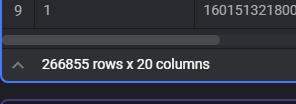

### Question 2. Data Transformation
### Upon filtering the dataset where the passenger count is greater than 0 and the trip distance is greater than zero, how many rows are left?

In [ ]:
# Transformation
if 'transformer' not in globals():
    from mage_ai.data_preparation.decorators import transformer
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test

import re


# Add a transformer block and perform the following:
## Remove rows where the passenger count is equal to 0 and the trip distance is equal to zero.
## Create a new column lpep_pickup_date by converting lpep_pickup_datetime to a date.
## Rename columns in Camel Case to Snake Case, e.g. VendorID to vendor_id.
# Add three assertions:
# vendor_id is one of the existing values in the column (currently)
# passenger_count is greater than 0
# trip_distance is greater than 0


@transformer
def transform(data, *args, **kwargs):
    """
    Template code for a transformer block.

    Add more parameters to this function if this block has multiple parent blocks.
    There should be one parameter for each output variable from each parent block.

    Args:
        data: The output from the upstream parent block
        args: The output from any additional upstream blocks (if applicable)

    Returns:
        Anything (e.g. data frame, dictionary, array, int, str, etc.)
    """
    # Specify your transformation logic here
    ## Remove rows where the passenger count is equal to 0 and the trip distance is equal to zero
    nonzero_passenger_distance = data[(data['passenger_count']>0)&(data['trip_distance'] > 0)]



    # Create a new column lpep_pickup_date by converting lpep_pickup_datetime to a date.
    nonzero_passenger_distance['lpep_pickup_date'] = nonzero_passenger_distance['lpep_pickup_datetime'].dt.date

    # Rename columns in Camel Case to Snake Case, e.g. VendorID to vendor_id.
    ## column with camel case VendorID, RatecodeID, PULocationID, DOLocationID

    #dictionary to map old column names to new names
    column_rename_mapping = {'VendorID':'vendor_id', 'RatecodeID': 'ratecode_id', 'PULocationID': 'pu_location_id', 'DOLocationID':'do_location_id'}

    #rename specific columns using rename() method
    renamed = nonzero_passenger_distance.rename(columns=column_rename_mapping)

    value_counts= renamed['vendor_id'].value_counts()
    print(value_counts)



    return renamed


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert 'vendor_id' in output.columns, 'Column vendor_id is missing'

@test
def test_output(output, *args) -> None:
    assert (output['passenger_count'] != 0).any(), 'Passenger_count still have nonzero'

@test
def test_output(output, *args) -> None:
    assert (output['trip_distance'] != 0).any(), 'trip_distance still have nonzero'

Output

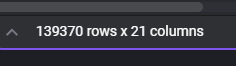

### Question 3. Data Transformation
### Which of the following creates a new column lpep_pickup_date by converting lpep_pickup_datetime to a date?

```
data['lpep_pickup_date'] = data['lpep_pickup_datetime'].dt.date
```

### Question 4. Data Transformation
### What are the existing values of VendorID in the dataset?

```
value_counts= renamed['vendor_id'].value_counts()
print(value_counts)
```
1 or 2

### Question 5. Data Transformation
### How many columns need to be renamed to snake case?
```
#dictionary to map old column names to new names
column_rename_mapping = {'VendorID':'vendor_id', 'RatecodeID': 'ratecode_id', 'PULocationID': 'pu_location_id', 'DOLocationID':'do_location_id'}

```

4

### Question 6. Data Exporting
### Once exported, how many partitions (folders) are present in Google Cloud?

Total folder partitioned by date is 95 + 1 parent folder = 96


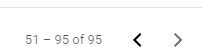